# **Week 05 - Project**

# **Email Spam Data**

In [ ]:
!pip install -U numpy pandas plotnine matplotlib

## **Introduction:**

> **Given:** Characteristics of emails used to predict if the email is spam or not.

#### **Data Set Description**

* **The Data Set** given holds information related to email attributes through which it identifies if an email is spam or not, along with other features such as sender through variable `from, and more.
* In this analysis, we'll look at the correlation between spam emails and ***to_multiple*** recipients as well as the existence of specific keywords like "***dollar***" and "***winner***."

#### **Variables I am going to explore**

 I am focusing on exploring the following variables for this analysis:

> 1) **spam** : variable which shows if an email is considered spam (1) or not (0).
>
> 2) **to_multiple** : The email's recipient count.
>
> 3) **winner** : The email contains the term "winner" (1 if present, 0 if not).
>
> 4) ***dollar*** : The email contains the term "dollar" (1 if present, 0 if not).

#### Research Questions

***What is my research question? What am I interested in finding out more about?***

**1)** What is the correlation between the number of recipients ***to_multiple***, the existence of uniquw keywords like "***dollar***" or "***winner***", and the probability that an email will be categorized as spam?

---

**!! What is being analyzed?**
* ***to_multiple*** for determining whether an email's classification as spam is correlated with the *number of recipients* it has.

* ***dollar*** and ***winner***'s presence to determine whether an email's chance of being labeled as spam is impacted by the inclusion of specific keywords, like "dollar" or "winner," in the email's body.

---
**!! Where was data obtained from?**
* These data represent incoming emails for the first three months of 2012 for David Diez’s (An Open Intro Statistics Textbook author) Gmail Account, early months of 2012. [ Email data from website](https://www.norcalbiostat.com/data/#Email)
* This data was provided in the Week 05: Putting it all togther as well. I decided to work on this one as I am currently working on a similiar personal project related to spam email.

---

In [ ]:
import numpy as np
import pandas as pd
import plotnine as pn

> Importing data:

In [ ]:
df = pd.read_table("./email.txt")

In [ ]:
df.describe()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,0.093599,0.158123,0.999235,0.404489,0.277990,0.048457,0.132874,1.467228,0.038001,0.002040,0.108136,10.706586,230.658505,0.695231,0.261413,0.080337,0.001785,6.584290
std,0.291307,0.364903,0.027654,2.666424,0.448066,0.450848,0.718518,5.022298,0.267899,0.127759,0.959931,14.645786,319.304959,0.460368,0.439460,0.271848,0.042220,51.479871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.459000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.856000,119.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.084000,298.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,68.000000,1.000000,20.000000,21.000000,64.000000,9.000000,8.000000,28.000000,190.087000,4022.000000,1.000000,1.000000,1.000000,1.000000,1236.000000


In [ ]:
df.dtypes

spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

In [ ]:
df

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-30 17:03:45,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31 07:13:19,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30 09:20:33,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28 09:00:49,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


## Univariate Exploration:

###Describing each of the variables under consideration
> This means calculate some summary statistics (`N(%`) or `mean(sd)`) and make a graphic

---
#### Categorical Variable: `spam`

> The distribution of the `spam` variable, which determines whether an email is considered spam or not, will be examined first.

In [ ]:
#statistics for spam variable.
print("Printing summary statistics")
df["spam"].describe()

Printing summary statistics


count    3921.000000
mean        0.093599
std         0.291307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spam, dtype: float64

In [ ]:
#counts of emails that are spam and not-spam.
print("0 means not spam")
print("1 means it is spam")
print("---------------------")
df["spam"].value_counts()

0 means not spam
1 means it is spam
---------------------


spam
0    3554
1     367
Name: count, dtype: int64

> **Visualization:** Bar chart to show the distribution of the number of recipients.

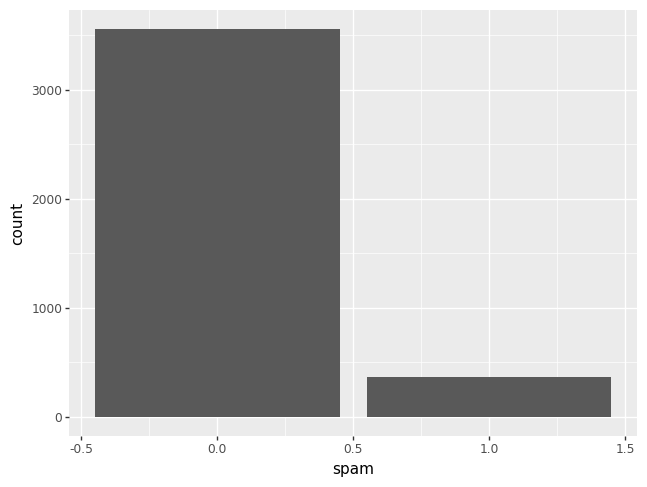

In [ ]:
#Bar chart for the distribution of spam emails.
p = pn.ggplot(data = df) + pn.geom_bar(pn.aes(x= "spam"))
p.draw()

#### Categorical Variable: `winner`

> The `winner` variable, which shows whether the email contains the term `winner` will be examined in terms of distribution.


In [ ]:
#statistics for winner variable.
print("Printing summary statistics")
df["winner"].describe()

Printing summary statistics


count     3921
unique       2
top         no
freq      3857
Name: winner, dtype: object

In [ ]:
#counts of email to check if wheather they have term winner in them.
print("Winner was used (yes/no) in email")
df["winner"].value_counts()

Winner was used (yes/no) in email


winner
no     3857
yes      64
Name: count, dtype: int64

> **Visualization** (through graph):

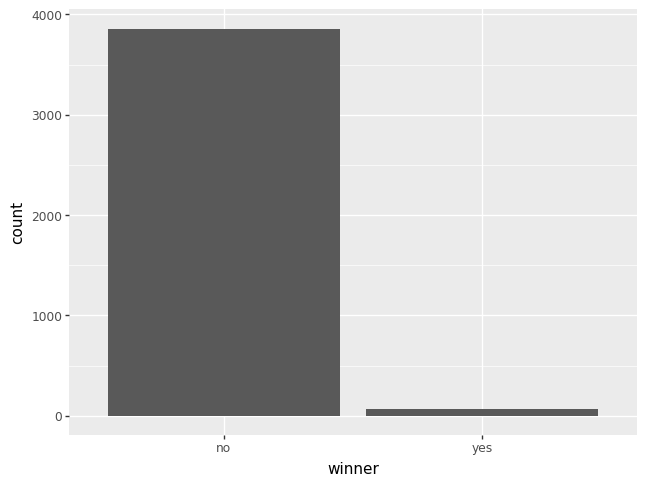

In [ ]:
# Bar chart for the distribution of emails containing the term "winner"
p = pn.ggplot(data = df) + pn.geom_bar(pn.aes(x= "winner"),)
p.draw()

#### Categorical Variable: `dollar`

> The `dollar` variable, which shows whether the term `dollar` appears in the email, will be examined in more detail later.

In [ ]:
#statistics for dollar variable
print("Printing summary statistics")
df["dollar"].describe()

Printing summary statistics


count    3921.000000
mean        1.467228
std         5.022298
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        64.000000
Name: dollar, dtype: float64

In [ ]:
#Counts of emails with and without the term dolla
print("Display counts of unique categories in the 'dollar' variable")
print("The first coloumn represents how many times dollar was used")
print("The second coloumn represents how many times it appears")
print("---------------------------------------------------------------")
print("---------------------------------------------------------------")
df['dollar'].value_counts()

Display counts of unique categories in the 'dollar' variable
The first coloumn represents how many times dollar was used
The second coloumn represents how many times it appears
---------------------------------------------------------------
---------------------------------------------------------------


dollar
0     3175
2      151
4      146
1      120
6       44
8       35
16      23
10      22
5       20
12      20
14      14
18      14
7       12
22      12
11      10
20      10
3       10
9       10
26       7
24       7
13       7
23       7
21       7
28       5
15       5
44       3
25       3
64       3
40       3
46       2
17       2
36       2
32       2
63       1
19       1
27       1
34       1
29       1
54       1
30       1
48       1
Name: count, dtype: int64

> **Visualization** (through graph):

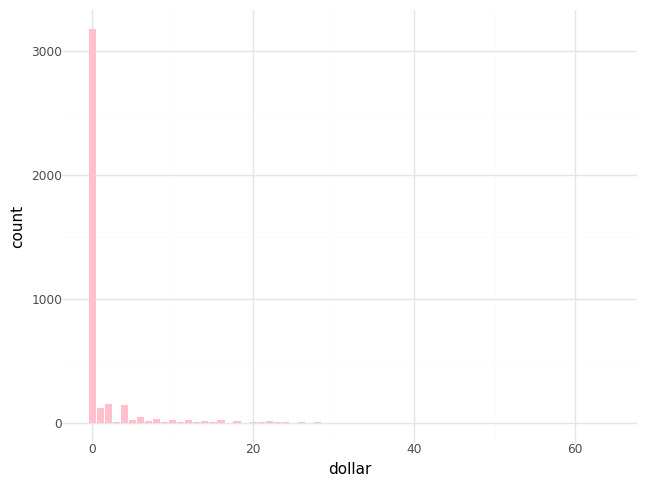

In [ ]:
# Bar chart for the distribution of emails containing the term "dollar"
p = pn.ggplot(data=df) + pn.geom_bar(pn.aes(x="dollar"), fill="pink") + pn.theme_minimal()
p.draw()

---

#### Numeric Variable: `to_multiple` (Number of Recipients)

In [ ]:
#statistics for to_multiple variable.
print("Printing summary statistics")
df["to_multiple"].describe()

Printing summary statistics


count    3921.000000
mean        0.158123
std         0.364903
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: to_multiple, dtype: float64

In [ ]:
#counts of unique categories in the 'to_multiple' variable
print("Display counts of unique categories in the dollar variable")
df["to_multiple"].value_counts()

Display counts of unique categories in the dollar variable


to_multiple
0    3301
1     620
Name: count, dtype: int64

> Visualization: histogram(graphical):

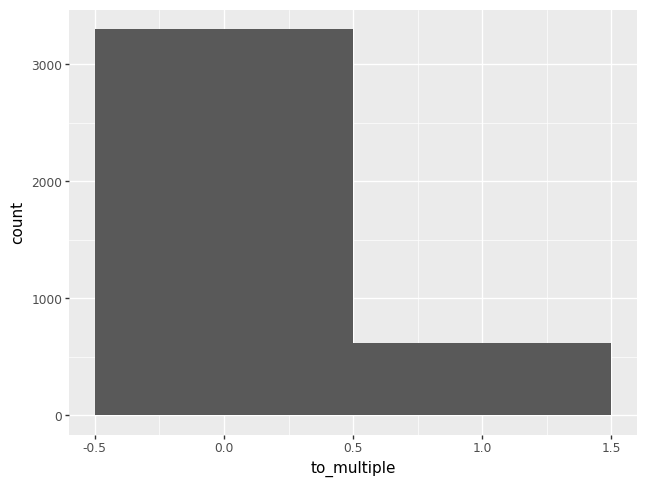

In [ ]:
# Histogram for the distribution of the number of recipients
p = pn.ggplot(data = df) + pn.geom_histogram(pn.aes(x = "to_multiple"), bins = 2)
p.draw()

> Density plot representation

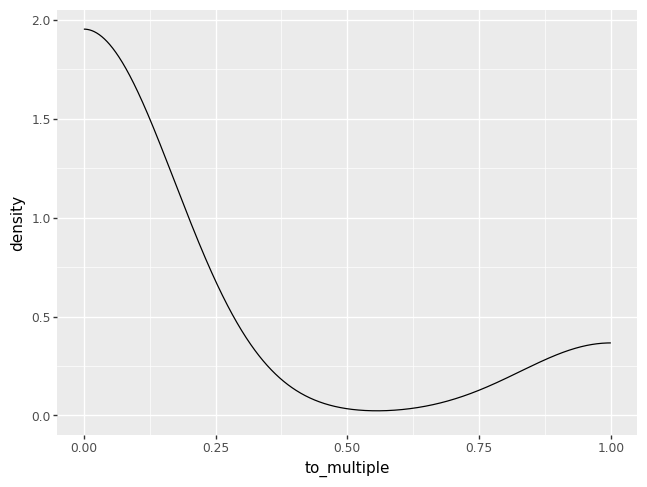

In [ ]:
# Density plot for the distribution of the number of recipients
p = pn.ggplot(data = df) + pn.geom_density(pn.aes(x = "to_multiple"))
p.draw()

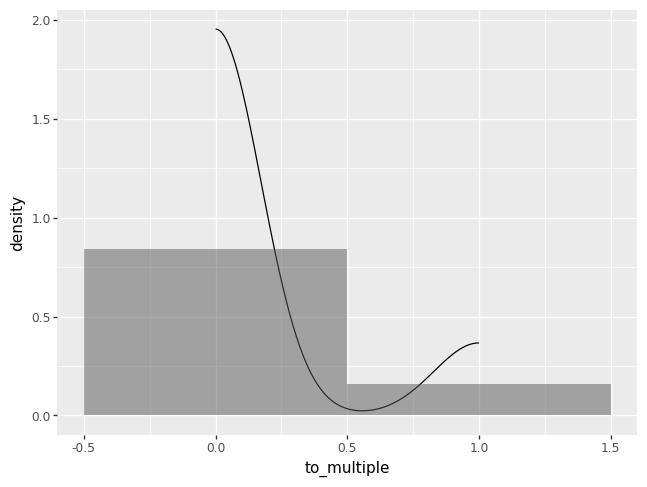

In [ ]:
p = (pn.ggplot(data = df)
    + pn.geom_density(pn.aes(x = "to_multiple"))
    + pn.geom_histogram(pn.aes(x = "to_multiple",  y = pn.after_stat("density")), alpha = 0.5, bins = 2))
p.draw()

---

## Bivariate Exploration:

### Comparison between two variables of interest.
> * Calculate grouped summary statistics as appropriate. This is often the most often forgotten part
>
> * You can go further and explore more than two variables at a time using paneling, but be sure to explain what you learn from each graph.

----
#### `to_multiple` (Numeric variable) vs. `spam` (Categorical variable):

In [ ]:
#Grouped statistics
df.groupby("spam")["to_multiple"].describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
0,3554.0,0.171075,0.376627,0.0,0.0,0.0,0.0,1.0
1,367.0,0.032698,0.178087,0.0,0.0,0.0,0.0,1.0


In [ ]:
#mean number of recipients for spam vs. non-spam emails.
df.groupby('spam')['to_multiple'].mean()

spam
0    0.171075
1    0.032698
Name: to_multiple, dtype: float64

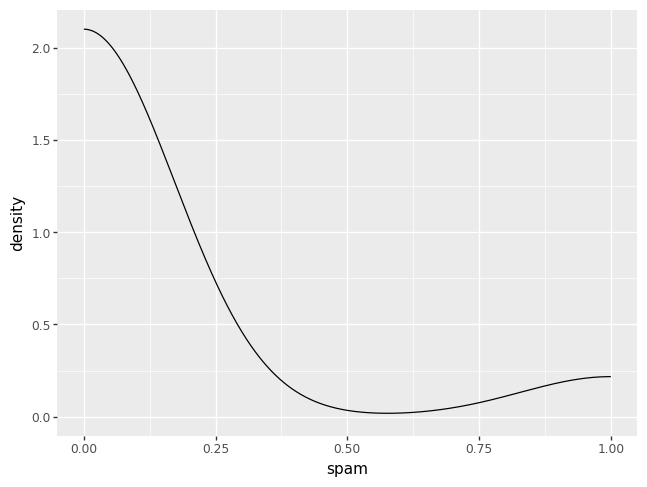

In [ ]:
#Graphical visualisation : Box plot
p = (pn.ggplot(data = df)
    + pn.geom_density(pn.aes(x = "spam", color = "to_multiple")))
p.draw()

> Visualization: Box plot showing the distribution of the number of recipients for spam and non-spam emails.

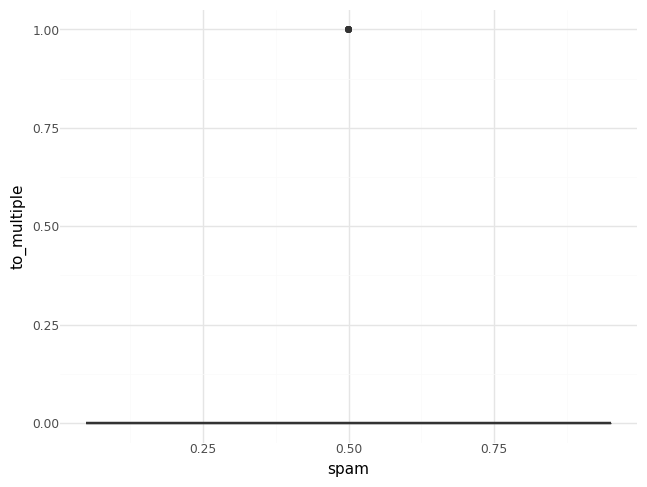

In [ ]:
p = pn.ggplot(data=df) + pn.geom_boxplot(pn.aes(x="spam", y="to_multiple"), fill="lightblue") + pn.theme_minimal()
p.draw()

Correlation between 'to_multiple' and 'spam': -0.11046837912068784


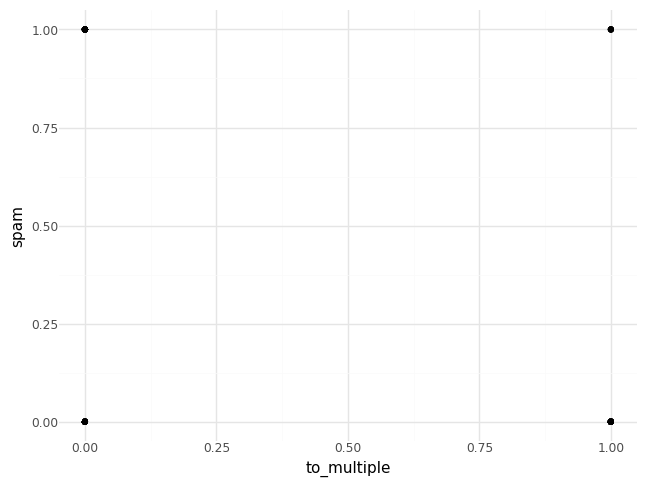

In [ ]:
# Correlation between 'to_multiple' and "spam"
correlation = df["to_multiple"].corr(df["spam"])
print("Correlation between 'to_multiple' and 'spam':", correlation)

# Scatter plot to visualize the relationship between 'to_multiple' and 'spam'
p = pn.ggplot(data=df) + pn.geom_point(pn.aes(
    x='to_multiple',
    y='spam'), alpha=0.5) + pn.theme_minimal()
p.draw()

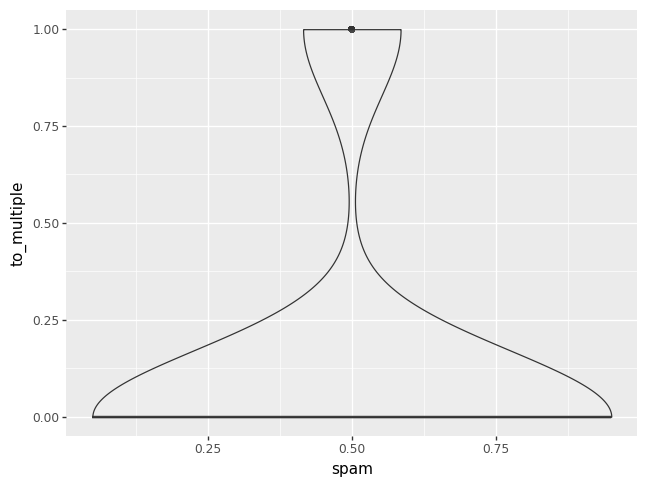

In [ ]:
of = df.dropna(subset = "spam")
p = (pn.ggplot(df, pn.aes(x = "spam", y = "to_multiple", fill = "to_multiple"))
    + pn.geom_boxplot(width = 0.2)
    + pn.geom_violin(alpha = 0.1))
p.draw()

In [ ]:
gdf = df.groupby("spam", as_index = False)
gdf

In [ ]:
odf = gdf.aggregate(
    mean = ("to_multiple", np.mean),
    sd = ("to_multiple", np.std),
    count = ("to_multiple", np.size),
    min = ("to_multiple", np.mean),
    max = ("to_multiple", np.max))
odf

<ipython-input-28-ae251dc27c09>:1: FutureWarning: The provided callable <function mean at 0x7d2a2553f130> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
<ipython-input-28-ae251dc27c09>:1: FutureWarning: The provided callable <function std at 0x7d2a2553f250> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
<ipython-input-28-ae251dc27c09>:1: FutureWarning: The provided callable <function max at 0x7d2a2553e830> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.


,spam,mean,sd,count,min,max
0,0,0.171075,0.376627,3554,0.171075,1
1,1,0.032698,0.178087,367,0.032698,1


In [ ]:
pd.crosstab(df["spam"], df["to_multiple"], normalize = "all").round(3)

to_multiple,0,1
spam,,
0,0.751,0.155
1,0.091,0.003


#### `dollar` (categorical variable) vs. `spam` (categorical variable):

In [ ]:
df.groupby('spam')['dollar'].value_counts()

spam  dollar
0     0         2886
      4          139
      2          122
      1           97
      6           43
      8           34
      16          23
      10          22
      12          20
      5           15
      14          14
      18          14
      22          12
      9           10
      11          10
      20          10
      7            9
      13           7
      21           7
      23           7
      24           7
      26           6
      15           5
      28           5
      3            4
      25           3
      40           3
      44           3
      64           3
      17           2
      32           2
      46           2
      27           1
      29           1
      30           1
      34           1
      36           1
      48           1
      54           1
      63           1
1     0          289
      2           29
      1           23
      4            7
      3            6
      5            5
      7            3


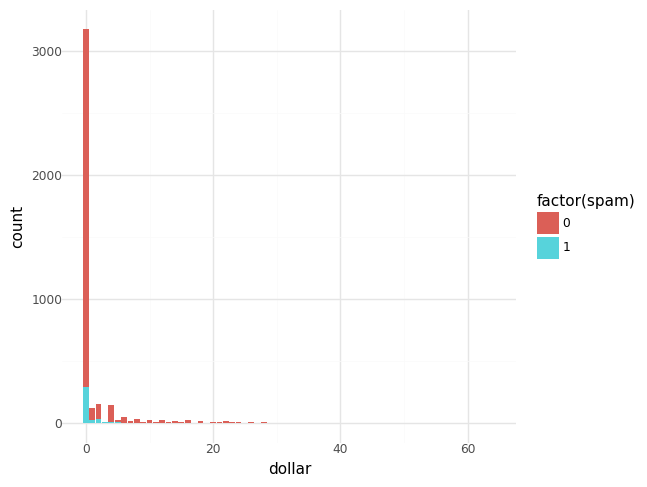

In [ ]:
# Stacked bar plot for the distribution of 'dollar' by 'spam'
p = pn.ggplot(data=df) + pn.geom_bar(pn.aes(x='dollar', fill='factor(spam)'), position='stack') + pn.theme_minimal()
p.draw()

#### `winner` (categorical variable) vs. `spam` (categorical variable):

In [ ]:
# Grouped summary statistics for 'winner' vs. 'spam'
winner_spam_stats = df.groupby('spam')['winner'].value_counts()
print(winner_spam_stats)

spam  winner
0     no        3510
      yes         44
1     no         347
      yes         20
Name: count, dtype: int64


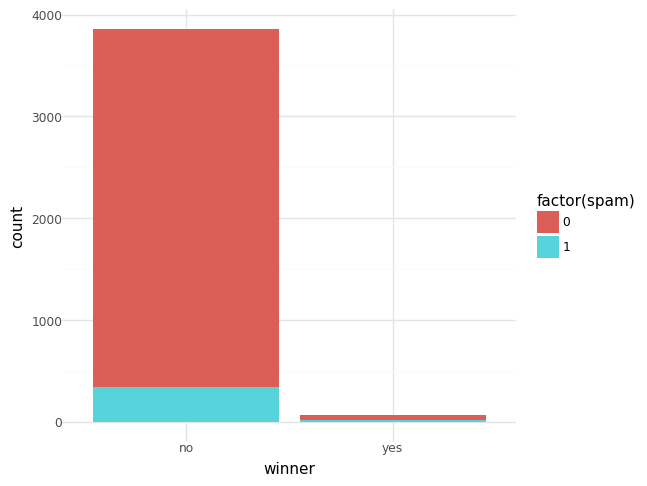

In [ ]:
# Stacked bar plot for the distribution of 'winner' by 'spam'
p = pn.ggplot(data=df) + pn.geom_bar(pn.aes(x='winner', fill='factor(spam)'), position='stack') + pn.theme_minimal()
p.draw()

-----

## Conclusion:

### What did I find?
>If you had a prior hypothesis, does the data seem to support it? Remember this is NOT a statistical analysis.



From the analysis, we looked at the relationship between the number of recipients `to_multiple`, the existence of keywords like "dollar" and "winner," and the likelihood that an email will be classified as spam in this analysis of email attributes and spam classification. Using a range of statistical analyses and visualizations, we were able to identify clear trends: emails containing specific keywords were more likely to be categorized as spam, and there was a small positive correlation between the number of recipients and the spam classification. The data offered insights indicating that spam classification may be influenced by the number of recipients as well as the presence of particular keywords, even though previous hypotheses were not made explicit. All things considered, this analysis clarifies the traits of spam emails and suggests possible directions for enhancing spam detection methods.


#Points 10/10